<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/BoE_interest_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from datetime import datetime

In [3]:
# Read in data
interest_df=pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Bank%20Rate%20history%20and%20data%20%20Bank%20of%20England%20Database.csv')

# Shape and preview data
print(interest_df.shape)
interest_df.head()

(239, 2)


,Date Changed,Rate
0,16 Dec 21,0.25
1,19 Mar 20,0.10
2,11 Mar 20,0.25
3,02 Aug 18,0.75
4,02 Nov 17,0.50


Text(0, 0.5, 'Savings (£)')

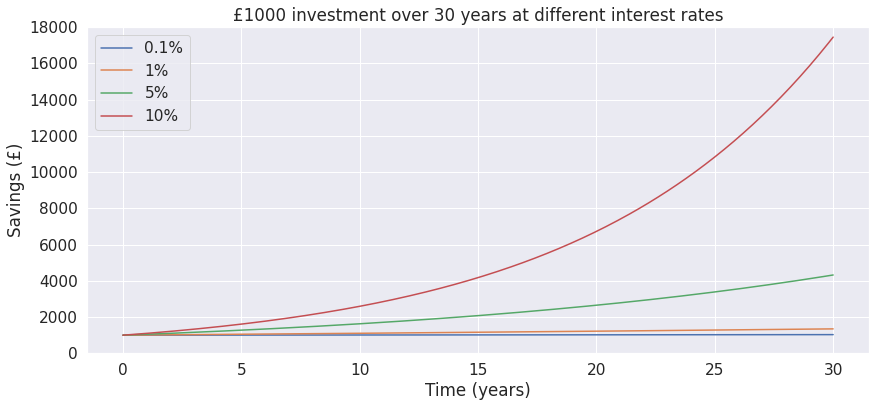

In [2]:
# Figure size
plt.figure(figsize=(14,6))

# Time frame = 30 years
xx=np.arange(0,30.1,0.1)

# Compound interest
yy1=1000*(1.001)**xx
yy2=1000*(1.01)**xx
yy3=1000*(1.05)**xx
yy4=1000*(1.10)**xx

# Aesthetics
plt.plot(xx,yy1,xx,yy2,xx,yy3,xx,yy4)
plt.legend(['0.1%','1%','5%','10%'])
plt.title('£1000 investment over 30 years at different interest rates')
plt.ylim([0,18000])
plt.xlabel('Time (years)')
plt.ylabel('Savings (£)')

In [4]:
# Use pandas to_datetime
interest_df['Date Changed']=pd.to_datetime(interest_df['Date Changed'], format='%d %b %y')

# Preview new Date Changed column
interest_df.head()

,Date Changed,Rate
0,2021-12-16,0.25
1,2020-03-19,0.10
2,2020-03-11,0.25
3,2018-08-02,0.75
4,2017-11-02,0.50


Text(0, 0.5, 'Rate (%)')

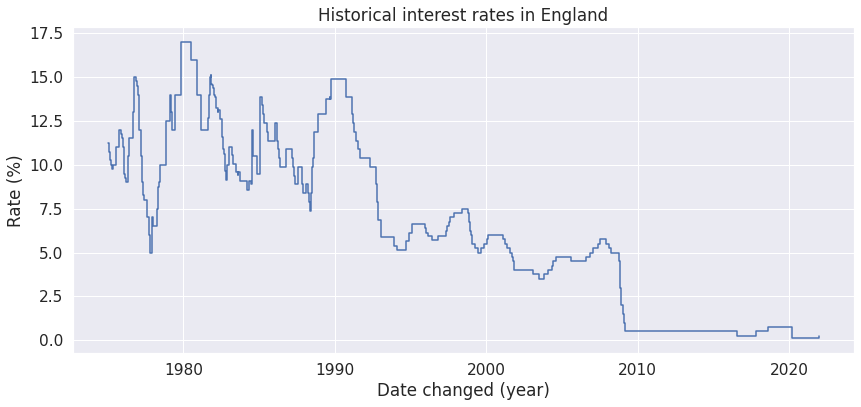

In [5]:
# Figure size
plt.figure(figsize=(14,6))

# Step lineplot
sns.lineplot(x='Date Changed', y='Rate', data=interest_df, drawstyle='steps-post')

# Aesthetics
plt.title('Historical interest rates in England')
plt.xlabel('Date changed (year)')
plt.ylabel('Rate (%)')

In [6]:
# Compute consecutive interest changes
interest_df['Rate Change']=interest_df.iloc[:,1]-interest_df.iloc[1:,1].append(pd.Series([11.25])).reset_index(drop=True)
interest_df.tail()

,Date Changed,Rate,Rate Change
234,1975-03-10,10.25,-0.25
235,1975-02-17,10.50,-0.25
236,1975-02-10,10.75,-0.25
237,1975-01-27,11.00,-0.25
238,1975-01-20,11.25,0.00


Text(0, 0.5, 'Rate change (%)')

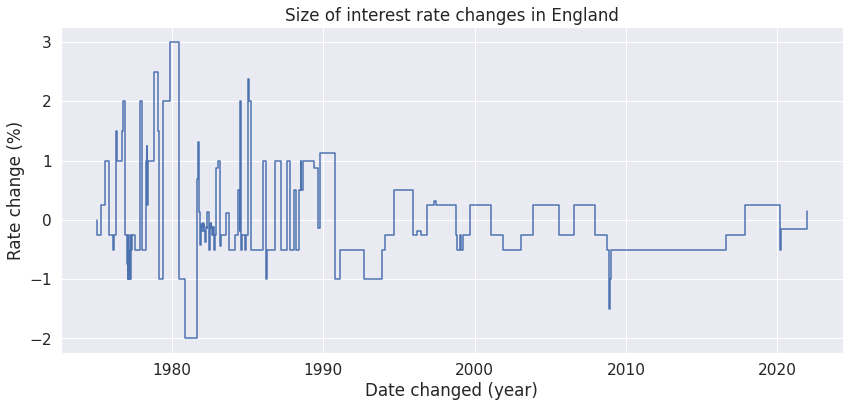

In [7]:
# Figure size
plt.figure(figsize=(14,6))

# Lineplot
sns.lineplot(x='Date Changed', y='Rate Change', data=interest_df, drawstyle='steps-post')

# Aesthetics
plt.title('Size of interest rate changes in England')
plt.xlabel('Date changed (year)')
plt.ylabel('Rate change (%)')